In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn import metrics

In [2]:
file_name='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
House_Data=pd.read_csv(file_name)

In [3]:
House_Data.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
House_Data.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
House_Data.drop(["id", "date"], axis=1, inplace=True)

In [6]:
House_Data.describe()

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
print("number of NaN values for the column bedrooms :", House_Data['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", House_Data['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


In [8]:
mean=House_Data['bedrooms'].mean()
House_Data['bedrooms'].replace(np.nan,mean, inplace=True)

In [9]:
mean=House_Data['bathrooms'].mean()
House_Data['bathrooms'].replace(np.nan,mean, inplace=True)

In [10]:
print("number of NaN values for the column bedrooms :", House_Data['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", House_Data['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


In [11]:
floor_counts = House_Data['floors'].value_counts().to_frame().reset_index()
floor_counts.columns = ['floors', 'count']
print(floor_counts)

   floors  count
0     1.0  10680
1     2.0   8241
2     1.5   1910
3     3.0    613
4     2.5    161
5     3.5      8


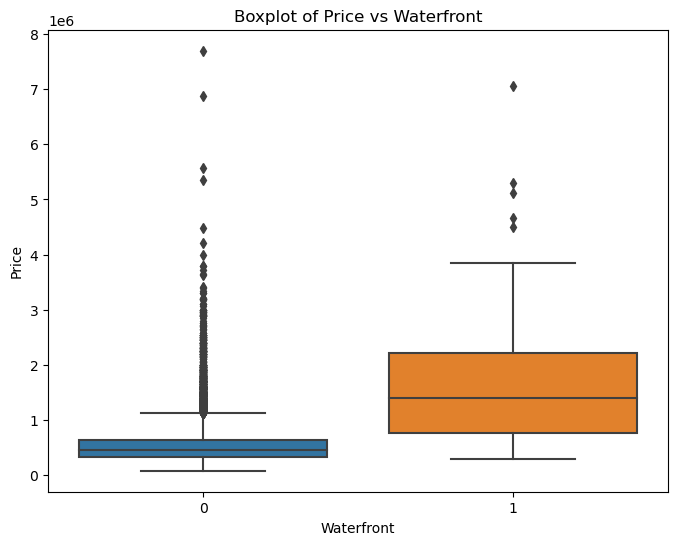

In [12]:
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sns.boxplot(x='waterfront', y='price', data=House_Data)
plt.title('Boxplot of Price vs Waterfront')
plt.xlabel('Waterfront')
plt.ylabel('Price')
plt.show()

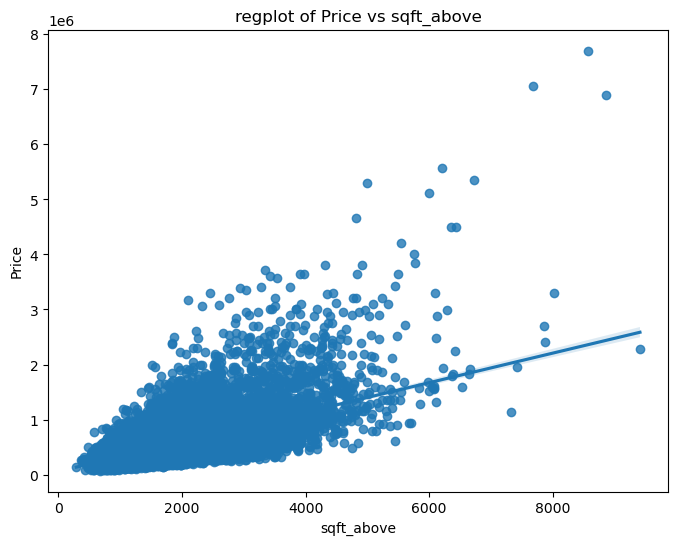

In [13]:
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sns.regplot(x='sqft_above', y='price', data=House_Data)
plt.title('regplot of Price vs sqft_above')
plt.xlabel('sqft_above')
plt.ylabel('Price')
plt.show()

In [36]:
X = House_Data[['sqft_living']]
y = House_Data['price']

model = LinearRegression()
model.fit(X, y)
model.score(X,y)

0.4928532179037931

In [37]:
X = House_Data[['sqft_living','floors','waterfront','lat','bedrooms','sqft_basement','view','bathrooms','sqft_living15','sqft_above','grade']]
y = House_Data['price']


model = LinearRegression()
model.fit(X, y)

model.score(X,y)

0.6576495060315226

In [38]:
X = House_Data[['sqft_living','floors','waterfront','lat','bedrooms','sqft_basement','view','bathrooms','sqft_living15','sqft_above','grade']]
y = House_Data['price']

pipeline = Pipeline([
    ('scaler', StandardScaler()),            
    ('poly', PolynomialFeatures(degree=2)),  
    ('regressor', LinearRegression())        
])

# Fit the pipeline on the training data
pipeline.fit(X, y)

pipeline.score(X,y)

0.7513408661240377

In [20]:
RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(X, y)
RidgeModel.score(X, y)

0.6576951534165586

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(X_train)
x_test_pr = pr.fit_transform(X_test)
RidgeModel_pr = Ridge(alpha=0.1)
RidgeModel_pr.fit(x_train_pr, y_train)
print("RidgeModel Test data R^2: ",RidgeModel_pr.score(x_test_pr, y_test))

RidgeModel Test data R^2:  0.7000720077616438
